In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Harshitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read scraped data from the CSV file. /Users/Harshitha/
data = pd.read_csv('Tweets.csv')

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data['text'][0]

'@VirginAmerica What @dhepburn said.'

In [5]:
(len(data)- data.count()) / len(data)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [6]:
data= data[['airline_sentiment','airline','text','negativereason']]

In [7]:
Reasons = data['negativereason'].dropna().unique()

In [8]:
airlines_list =[]
airlines_list = data['airline'].unique()
print(airlines_list)

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [9]:
def overallCount(data):
    data['airline_sentiment'].value_counts().plot(kind='bar')

In [10]:
def individualCount(data):
    data['airline'].value_counts().plot(kind='bar') 

In [11]:
def splitwiseCount(data):
    data.groupby(['airline','airline_sentiment']).size().unstack().plot(kind='bar')
    

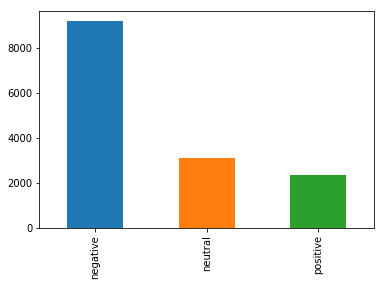

In [12]:
overallCount(data)

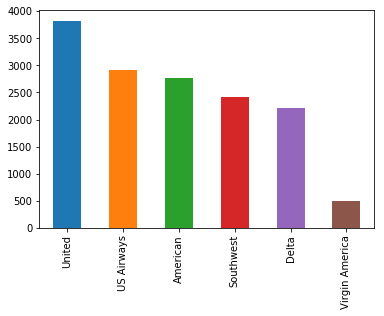

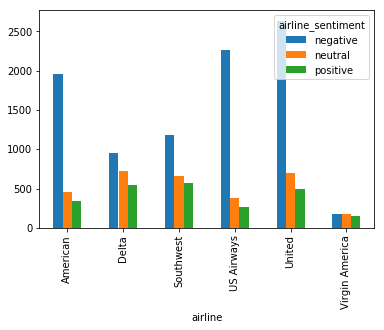

In [13]:

individualCount(data)
splitwiseCount(data)


In [14]:
def calcLength(tweet):
    words = re.sub("[^a-zA-Z]", " ",tweet)
    lower_words = words.lower().split()
    stopword= set(stopwords.words("english"))
    useful_words = []
    for word in lower_words:
        if word in stopword: continue
        else: useful_words.append(word)
    tweet_length = len(useful_words)
    return tweet_length

In [15]:
 def useful_words(tweet):
    words = re.sub("[^a-zA-Z]", " ",tweet)
    lower_words = words.lower().split()
    stopword= set(stopwords.words("english"))
    useful_words = []
    for word in lower_words:
        if word in stopword: continue
        else: useful_words.append(word)
    #useful_words = np.array(useful_words)
    useful_words = ' '.join(useful_words)
    return useful_words

In [16]:
def identify_reason(airline):
    if airline=='All':
        negTweet = data
    else:
        negTweet = data[data['airline']==airline]
    count= dict(negTweet['negativereason'].value_counts())
    negreason_list=list(negTweet['negativereason'].unique())
    negreason_array= [x for x in negreason_list if str(x) != 'nan']
    negreason_frame=pd.DataFrame({'Reasons':negreason_array})
    negreason_frame['count']=negreason_frame['Reasons'].apply(lambda x: count[x])
    #print(negreason_frame)
    negreason_frame.plot.bar(y='count',x ='Reasons', title= airline,rot=90)

In [17]:
airlines_list = np.append(airlines_list, 'All')
print(airlines_list)

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American'
 'All']


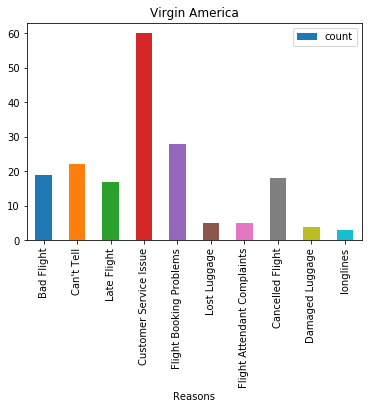

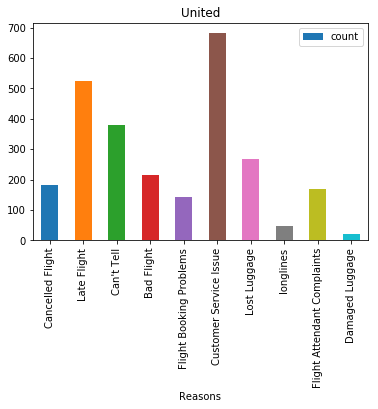

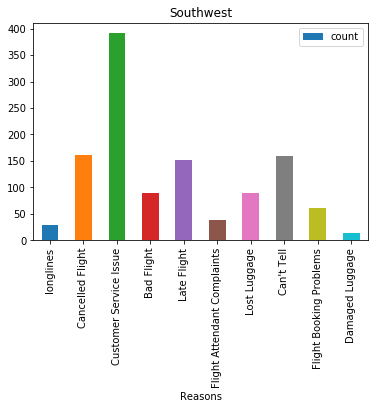

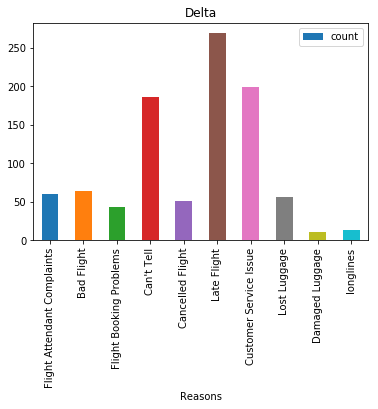

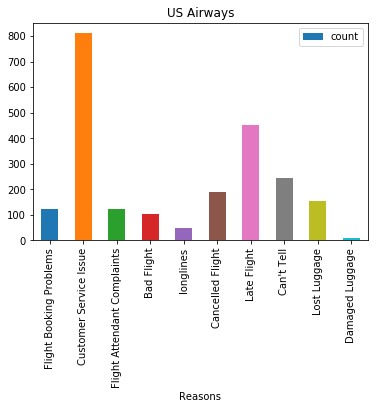

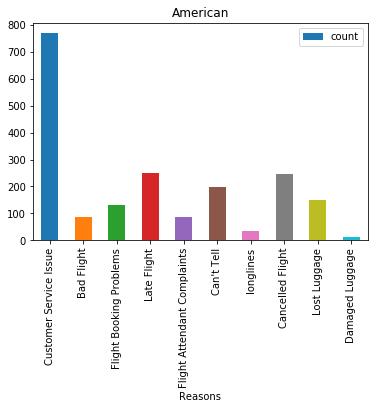

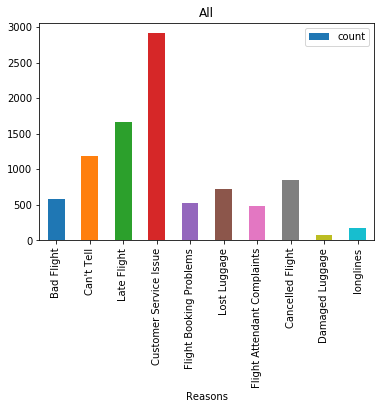

In [18]:
for airline in airlines_list:
    identify_reason(airline)

In [19]:
data.head()

,airline_sentiment,airline,text,negativereason
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,NaN
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,NaN
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,Bad Flight
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,Can't Tell


In [20]:
data['sentiment'] = data['airline_sentiment'].apply(lambda x : 1 if x=='positive' else(-1 if x =='negative' else 0))


In [21]:
data.head()

,airline_sentiment,airline,text,negativereason,sentiment
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,NaN,0
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,NaN,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN,0
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,Bad Flight,-1
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,Can't Tell,-1


In [22]:
data['tweet_length'] =data['text'].apply(lambda x: calcLength(x))
data['useful_words'] =data['text'].apply(lambda x: useful_words(x))

In [23]:
data.head()

,airline_sentiment,airline,text,negativereason,sentiment,tweet_length,useful_words
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,NaN,0,3,virginamerica dhepburn said
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,NaN,1,6,virginamerica plus added commercials experienc...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN,0,8,virginamerica today must mean need take anothe...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,Bad Flight,-1,11,virginamerica really aggressive blast obnoxiou...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,Can't Tell,-1,5,virginamerica really big bad thing


In [24]:
X_train,X_test = train_test_split(data,test_size=0.2,random_state=123)

In [25]:
X_train_Usefulwords = []
for tweet in X_train['useful_words']:
    X_train_Usefulwords.append(tweet)
X_test_Usefulwords = []
for tweet in X_test['useful_words']:
    X_test_Usefulwords.append(tweet)

In [26]:
words = ' '.join('@VirginAmerica What @dhepburn said.')
type(words)
words = useful_words('@VirginAmerica What @dhepburn said.')
type(words)

str

In [27]:
vector = CountVectorizer(analyzer = "word")
train_features= vector.fit_transform(X_train_Usefulwords)
test_features=vector.transform(X_test_Usefulwords)

In [28]:
fitRF = RandomForestClassifier(random_state=10, class_weight="balanced", oob_score=True)

#paramGrid = {
                #"max_depth": [5,7,10],
                #"max_features": ['auto'],
                #"min_samples_split": [4,16,32,len(X_train.columns)],
                #"min_samples_leaf": [5, 10],
                #"bootstrap": [True],
                #"criterion": ["gini", "entropy"],
                #"n_estimators":[50,100]}

#    cvRF.fit(train_x, train_y)
#    numParams= len(cvRF.cv_results_['params'])
#    print( cvRF.best_params_)
#    bestRF = cvRF.best_estimator_

In [29]:
accuracy_dict={'RandomForest':RandomForestClassifier(n_estimators=200),
               'DecisionTree':DecisionTreeClassifier(),
               'SVC':SVC(kernel="rbf", C=0.025, gamma ='auto',probability=True),
               'KNN': KNeighborsClassifier(3),
               'Xgboost': XGBClassifier()}

In [30]:
df_accuracy = pd.DataFrame(columns=['Classifier', 'Accuracy'])

In [31]:
index = 0
for classifier in accuracy_dict:
    model = accuracy_dict[classifier].fit(train_features,X_train['sentiment'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,X_test['sentiment'])
    #accuracy_dict[classifier]= accuracy
    df_accuracy.loc[index] = [classifier,accuracy]
    index = index + 1

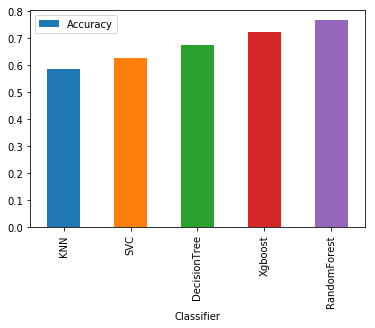

In [32]:
df_accuracy = df_accuracy.sort_values(by='Accuracy')
df_accuracy.plot(x='Classifier',y='Accuracy',kind='bar')

# check the polarity for the current Tweets

In [33]:
#"/Users/Harshitha/Desktop/LargeScaleAnly/Data/"
ScrapedData = "ScrapedData.csv"
df= pd.read_csv(ScrapedData)
df.head()

,User,Airlines,Createdtime,Text
0,maverickboy2,@SouthwestAir,7/7/19 20:10,b'@SouthwestAir @SacIntlAirport @kcranews @sac...
1,Clement23,@SouthwestAir,7/7/19 20:10,b'Thank you Michael and Diana for helping our ...
2,Disney_luvver,@SouthwestAir,7/7/19 20:10,b'@SouthwestAir Hey @SouthwestAir I heard this...
3,MightBeHankHill,@SouthwestAir,7/7/19 20:09,b'@SouthwestAir so is FLT 1633 gonna be landin...
4,OlAndrewsMum,@SouthwestAir,7/7/19 20:05,b'@jpnKevin_T @lachlan @SouthwestAir The Frenc...


In [34]:
df['tweet_length'] =df['Text'].apply(lambda x: calcLength(x))
df['useful_words'] =df['Text'].apply(lambda x: useful_words(x))

In [35]:
predict_Usefulwords = []
for tweet in df['useful_words']:
    predict_Usefulwords.append(tweet)

In [36]:
predict_features=vector.transform(predict_Usefulwords)
predictions = model.predict(predict_features)
df['Output'] = predictions
output = df[['Airlines','Text','Output']]
output.to_csv("/Users/Harshitha/Desktop/output.csv", index=False)

In [37]:
output.head()

,Airlines,Text,Output
0,@SouthwestAir,b'@SouthwestAir @SacIntlAirport @kcranews @sac...,-1
1,@SouthwestAir,b'Thank you Michael and Diana for helping our ...,1
2,@SouthwestAir,b'@SouthwestAir Hey @SouthwestAir I heard this...,-1
3,@SouthwestAir,b'@SouthwestAir so is FLT 1633 gonna be landin...,-1
4,@SouthwestAir,b'@jpnKevin_T @lachlan @SouthwestAir The Frenc...,-1


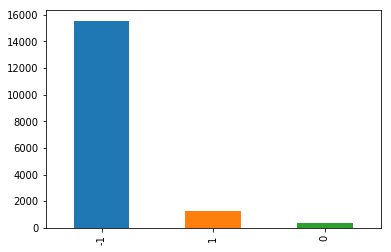

In [38]:
df['Output'].value_counts().plot(kind='bar')

In [39]:
print(df['Airlines'].unique())

['@SouthwestAir' '@VirginAmerica' '@USAirways' '@united' '@Delta'
 '@AmericanAir' '@JetBlue' '@AlaskaAir' '@HawaiianAir' '@SpiritAirlines'
 '@SkyWestAirlines']


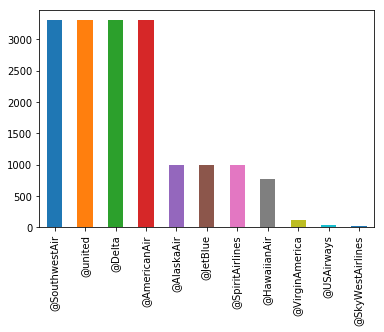

In [40]:
df['Airlines'].value_counts().plot(kind='bar') 

In [41]:
df.head()

,User,Airlines,Createdtime,Text,tweet_length,useful_words,Output
0,maverickboy2,@SouthwestAir,7/7/19 20:10,b'@SouthwestAir @SacIntlAirport @kcranews @sac...,20,b southwestair sacintlairport kcranews sacbee ...,-1
1,Clement23,@SouthwestAir,7/7/19 20:10,b'Thank you Michael and Diana for helping our ...,9,b thank michael diana helping family southwest...,1
2,Disney_luvver,@SouthwestAir,7/7/19 20:10,b'@SouthwestAir Hey @SouthwestAir I heard this...,14,b southwestair hey southwestair heard xe x x g...,-1
3,MightBeHankHill,@SouthwestAir,7/7/19 20:09,b'@SouthwestAir so is FLT 1633 gonna be landin...,7,b southwestair flt gonna landing laps beach,-1
4,OlAndrewsMum,@SouthwestAir,7/7/19 20:05,b'@jpnKevin_T @lachlan @SouthwestAir The Frenc...,20,b jpnkevin lachlan southwestair frenchie looks...,-1


In [42]:
df.groupby(['Airlines','Output']).size()

Airlines          Output
@AlaskaAir        -1         912
                   0           2
                   1          86
@AmericanAir      -1        3106
                   0          14
                   1         180
@Delta            -1        3074
                   0          28
                   1         198
@HawaiianAir      -1         730
                   0           8
                   1          38
@JetBlue          -1         722
                   0         164
                   1         114
@SkyWestAirlines  -1          18
                   0           1
                   1           3
@SouthwestAir     -1        2855
                   0          84
                   1         361
@SpiritAirlines   -1         916
                   0          13
                   1          71
@USAirways        -1          31
                   0           1
                   1           3
@VirginAmerica    -1          81
                   0          29
                  

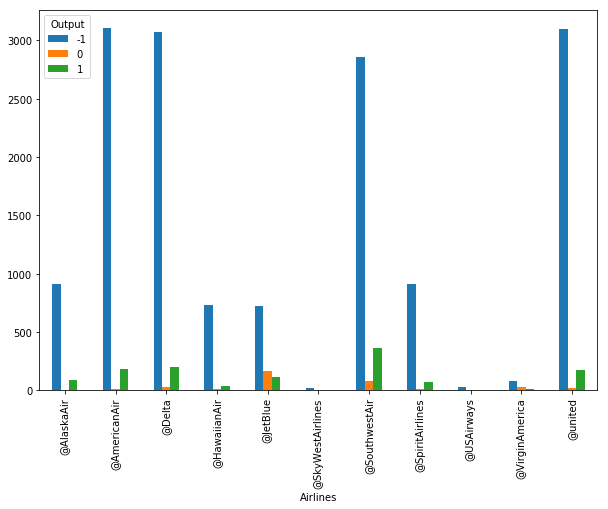

In [43]:
df.groupby(['Airlines','Output']).size().unstack().plot(kind='bar',figsize=(10,7))